In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pickle

In [5]:
df = pd.read_csv("../Datasets/cleaned_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,3.401197,3.449988,26.6,0.351,31,0
1,1,89,66,3.178054,4.553877,28.1,0.167,21,0
2,5,116,74,3.178054,3.449988,25.6,0.201,30,0
3,10,115,72,3.178054,3.449988,35.3,0.134,29,0
4,4,110,92,3.178054,3.449988,37.6,0.191,30,0


In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [11]:
for name, model in models.items():
    print(f'\nModel: {name}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}')


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        96
           1       0.80      0.78      0.79       104

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200

Accuracy: 0.7850
AUC-ROC: 0.8458

Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        96
           1       0.88      0.88      0.88       104

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

Accuracy: 0.8800
AUC-ROC: 0.9424

Model: XGBoost
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        96
           1       0.85      0.90      0.88       104

    accuracy                           0.87       

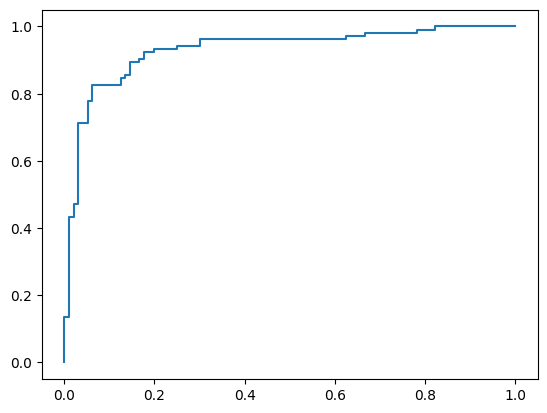

In [12]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

C:\Users\bikas\AppData\Local\Temp\ipykernel_45356\1478956020.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


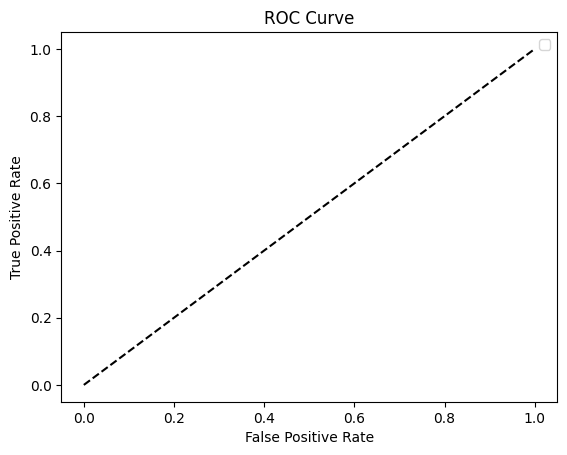

In [13]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [14]:
with open('xgboost_diabetes_model.pkl', 'wb') as file:
    pickle.dump(models['XGBoost'], file)

In [15]:
with open('X_train_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)